# Testing different Model and validation of the model

knearset neighbor 

Logistic Regression 

Random Forest 

Perceptron

SVM

In [1]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [2]:
# import data and split into train and test
df = pd.read_csv('../../Data/cleaned_data.csv')

print (df.head())

# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('FraudResult',axis=1), df['FraudResult'], test_size=0.30, random_state=101)



   BatchId  AccountId  SubscriptionId  CustomerId  ProviderId  ProductId  \
0    36123       3957             887        4406           6         10   
1    15642       4841            3829        4406           4          6   
2    53941       4229             222        4683           6          1   
3   102363        648            2185         988           1         21   
4    38780       4841            3829         988           4          6   

   ProductCategory  ChannelId   Amount  Value  TransactionStartTime  \
0              0.0          3   1000.0   1000                     2   
1              2.0          2    -20.0     20                     2   
2              0.0          3    500.0    500                     2   
3              8.0          3  20000.0  21800                     3   
4              2.0          2   -644.0    644                     3   

   PricingStrategy  FraudResult  
0                2            0  
1                2            0  
2             

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


# Create a network with 1 hidden layer
model = keras.Sequential(
    [
        layers.Dense(units=512,activation='relu',  input_shape=([X_train.shape[-1]])),
        layers.Dense(units=512,activation='relu'),
        layers.Dense(units=512,activation='relu'),
        layers.Dense(units=512,activation='relu'),
        layers.Dense(1), 


    ]
)




In [4]:
model.compile(
    optimizer='adam',
    loss='mae',)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=100
)



Epoch 1/100
131/131 [==============================] - 12s 70ms/step - loss: 417.1639 - val_loss: 13.5834
Epoch 2/100
131/131 [==============================] - 9s 70ms/step - loss: 20.4370 - val_loss: 6.3971
Epoch 3/100
131/131 [==============================] - 11s 82ms/step - loss: 6.6659 - val_loss: 1.7682
Epoch 4/100
131/131 [==============================] - 10s 73ms/step - loss: 4.5223 - val_loss: 2.7879
Epoch 5/100
131/131 [==============================] - 10s 79ms/step - loss: 7.7916 - val_loss: 17.8282
Epoch 6/100
131/131 [==============================] - 11s 83ms/step - loss: 4.7343 - val_loss: 1.8635
Epoch 7/100
131/131 [==============================] - 12s 89ms/step - loss: 1.5836 - val_loss: 1.2374
Epoch 8/100
131/131 [==============================] - 13s 97ms/step - loss: 1.3886 - val_loss: 0.9372
Epoch 9/100
131/131 [==============================] - 13s 98ms/step - loss: 1.7678 - val_loss: 0.9141
Epoch 10/100
131/131 [==============================] - 13s 101ms/ste

Minimum validation loss: 0.0017111108172684908


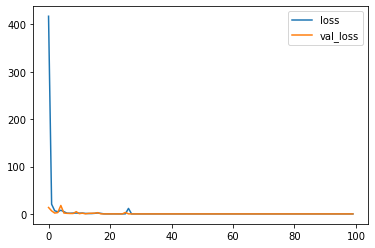

In [5]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

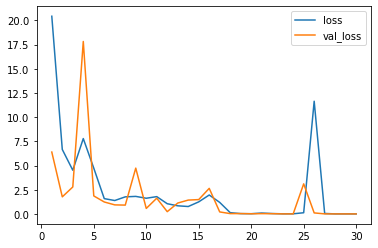

In [8]:
history_df.loc[1:30, ['loss', 'val_loss']].plot();